## Vector data in Python

Setup: https://carpentries-incubator.github.io/geospatial-python/index.html

Instruction: https://carpentries-incubator.github.io/geospatial-python/07-vector-data-in-python.html

Be sure to download the following in place into a 'data' folder
* [brpgewaspercelen_definitief_2020_small.gpkg](https://figshare.com/ndownloader/files/37729413)
* [brogmwvolledigeset.zip](https://figshare.com/ndownloader/files/37729416)
* [status_vaarweg.zip](https://figshare.com/ndownloader/files/37729419)

Objectives:
* Load spatial objects.
* Select the spatial objects within a bounding box.
* Perform a CRS conversion of spatial objects.
* Select features of spatial objects.
* Match objects in two datasets based on their spatial relationships.

In [1]:
# first import necessary libraries
import geopandas as gpd

In [6]:
#  use the geopandas package to load the crop field vector data we downloaded
fields = gpd.read_file("data/brpgewaspercelen_definitief_2020_small.gpkg")
print(fields.crs)
fields

EPSG:28992


,category,gewas,gewascode,jaar,status,geometry
0,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((117626.809 505287.535, 117622.930 50..."
1,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((117744.449 504313.788, 117746.064 50..."
2,Grasland,"Grasland, natuurlijk. Hoofdfunctie landbouw.",331,2020,Definitief,"POLYGON ((117784.216 503525.695, 117789.021 50..."
3,Grasland,"Grasland, natuurlijk. Hoofdfunctie landbouw.",331,2020,Definitief,"POLYGON ((117903.681 504159.929, 117908.257 50..."
4,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((118150.139 505369.637, 118168.010 50..."
...,...,...,...,...,...,...
22026,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((139366.829 479190.018, 139391.354 47..."
22027,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((138750.889 478528.117, 138722.478 47..."
22028,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((139214.523 479446.287, 139104.402 47..."
22029,Bouwland,"Maïs, snij-",259,2020,Definitief,"POLYGON ((140196.363 479281.898, 140195.206 47..."


In [5]:
# Define bounding box using data CRS
xmin, xmax = (110_000, 140_000)
ymin, ymax = (470_000, 510_000)
bbox = (xmin, ymin, xmax, ymax)
print(bbox)
# other options 
#Use the use the “Draw Rectangular Polygon” https://geojson.io/ but you'd need to reproj to EPSG:4326 (WGS 84)

(110000, 470000, 140000, 510000)


In [4]:
# Partially load data within the bounding box
fields = gpd.read_file("data/brpgewaspercelen_definitief_2020_small.gpkg", bbox=bbox)

<Axes: >

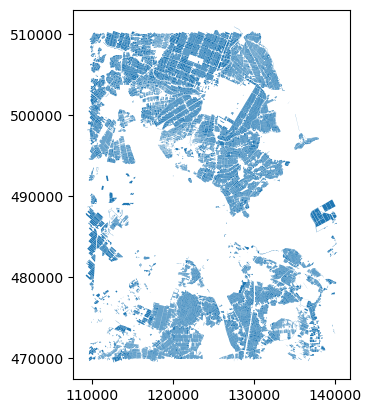

In [5]:
# Plot the overview
fields.plot()

In [6]:
# show the geometry types
fields.type

0        Polygon
1        Polygon
2        Polygon
3        Polygon
4        Polygon
          ...   
22026    Polygon
22027    Polygon
22028    Polygon
22029    Polygon
22030    Polygon
Length: 22031, dtype: object

In [7]:
# show the coordinate reference system (crs)
fields.crs

<Projected CRS: EPSG:28992>
Name: Amersfoort / RD New
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Netherlands - onshore, including Waddenzee, Dutch Wadden Islands and 12-mile offshore coastal zone.
- bounds: (3.2, 50.75, 7.22, 53.7)
Coordinate Operation:
- name: RD New
- method: Oblique Stereographic
Datum: Amersfoort
- Ellipsoid: Bessel 1841
- Prime Meridian: Greenwich

In [8]:
# show the bounds
fields.total_bounds

array([109222.03325 , 469461.512625, 140295.122125, 510939.997875])

In [10]:
# Use a smaller bounding box to crop the data without reloading it
xmin, xmax = (120_000, 135_000)
ymin, ymax = (485_000, 500_000)

fields_cx = fields.cx[xmin:xmax, ymin:ymax]
# coordinate indexer (cx) docs https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.cx.html


In [11]:
# Export data to file
fields_cx.to_file('fields_cropped.shp')

## Selecting spatial features

In [12]:
#load our exported data
fields = gpd.read_file("fields_cropped.shp")
# load underground water monitoring wells.
wells = gpd.read_file("data/brogmwvolledigeset.zip")

<Axes: >

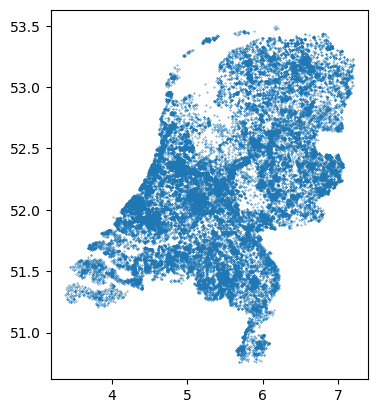

In [12]:
#plot the wells with marker size 0.1
wells.plot(markersize=0.1)

In [13]:
# change projection to match fields
wells = wells.to_crs(epsg=28992)

In [14]:
#compare the wells with the cropped fields
wells_clip = wells.clip(fields)
wells_clip
# note this will take some time

,bro_id,delivery_accountable_party,quality_regime,with_prehistory,delivery_context,construction_standard,initial_function,removed,number_of_monitoring_tubes,groundlevel_stable,...,corrected,latest_correction_time,under_review,under_review_time,deregistered,deregistration_time,reregistered,reregistration_time,coordinate_transformation,geometry
37326,GMW000000046390,27364178,IMBRO/A,ja,archiefoverdracht,onbekend,stand,nee,2.0,ja,...,nee,None,nee,None,nee,None,nee,None,RDNAPTRANS2008,POINT (125500.001 494650.001)
38348,GMW000000045718,27364178,IMBRO/A,ja,archiefoverdracht,onbekend,stand,ja,1.0,nee,...,nee,None,nee,None,nee,None,nee,None,RDNAPTRANS2008,POINT (127050.001 496040.001)
40703,GMW000000043444,27364178,IMBRO/A,ja,archiefoverdracht,onbekend,stand,ja,1.0,nee,...,nee,None,nee,None,nee,None,nee,None,RDNAPTRANS2008,POINT (127050.001 496040.001)
19445,GMW000000024992,50200097,IMBRO/A,ja,archiefoverdracht,onbekend,stand,nee,1.0,ja,...,nee,None,nee,None,nee,None,nee,None,RDNAPTRANS2008,POINT (121980.001 500180.001)
40174,GMW000000043963,27364178,IMBRO/A,ja,archiefoverdracht,onbekend,stand,nee,1.0,nee,...,nee,None,nee,None,nee,None,nee,None,RDNAPTRANS2008,POINT (130840.000 491095.001)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38624,GMW000000045994,27364178,IMBRO/A,ja,archiefoverdracht,onbekend,stand,ja,1.0,nee,...,nee,None,nee,None,nee,None,nee,None,RDNAPTRANS2008MV0,POINT (133160.001 497960.000)
39248,GMW000000044430,27364178,IMBRO/A,ja,archiefoverdracht,onbekend,stand,ja,1.0,nee,...,nee,None,nee,None,nee,None,nee,None,RDNAPTRANS2008,POINT (133160.001 497960.000)
38779,GMW000000045404,27364178,IMBRO/A,ja,archiefoverdracht,onbekend,stand,nee,1.0,ja,...,nee,None,nee,None,nee,None,nee,None,RDNAPTRANS2008MV0,POINT (133220.001 497974.999)
40422,GMW000000044026,27364178,IMBRO/A,ja,archiefoverdracht,onbekend,stand,ja,1.0,ja,...,nee,None,nee,None,nee,None,nee,None,RDNAPTRANS2008,POINT (133220.001 497974.999)


<Axes: >

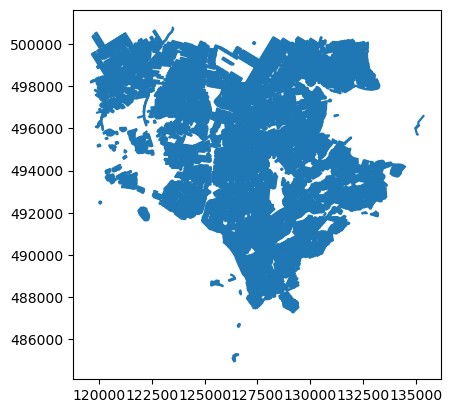

In [13]:
# use a 50 meter buffer to match the points in the neighborhood of the fields
buffer = fields.buffer(50)

#to keep the other columns, assign it to the GeoDataFrame as a geometry column
fields_buffer = fields.copy()
fields_buffer['geometry'] = buffer 

fields_buffer.plot()

In [14]:
# use the dissolve function to dissolve the buffers into one shape
fields_buffer_dissolve = fields_buffer.dissolve()
fields_buffer_dissolve

,geometry,category,gewas,gewascode,jaar,status
0,"MULTIPOLYGON (((120135.730 492480.424, 120133....",Grasland,"Grasland, blijvend",265,2020,Definitief


                bro_id delivery_accountable_party quality_regime  \
25305  GMW000000032114                   34366966        IMBRO/A   
51902  GMW000000054133                   50200097        IMBRO/A   
28141  GMW000000033322                   34366966          IMBRO   
27007  GMW000000033522                   34366966        IMBRO/A   
28068  GMW000000034289                   34362354        IMBRO/A   
...                ...                        ...            ...   
38624  GMW000000045994                   27364178        IMBRO/A   
39248  GMW000000044430                   27364178        IMBRO/A   
38779  GMW000000045404                   27364178        IMBRO/A   
40422  GMW000000044026                   27364178        IMBRO/A   
16926  GMW000000025310                   50200097        IMBRO/A   

      with_prehistory   delivery_context construction_standard  \
25305              ja       publiekeTaak              onbekend   
51902              ja  archiefoverdracht           

<Axes: >

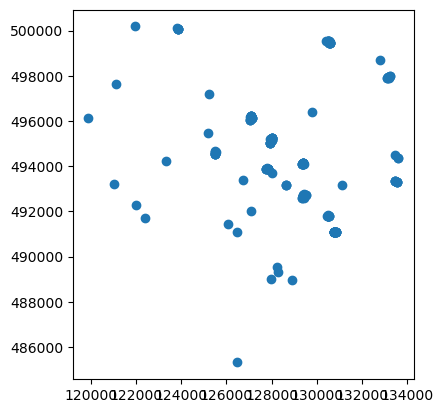

In [18]:
# try the clip again
wells_clip_buffer = wells.clip(fields_buffer_dissolve)
#print(wells_clip_buffer)
wells_clip_buffer.plot()

<Axes: >

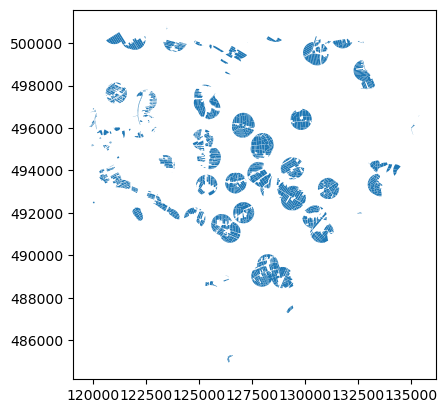

In [15]:
# Exercise: Clip field wells within 500m from the wells
# * visualize the results.
fields =  gpd.read_file("fields_cropped.shp")
wells = gpd.read_file("data/brogmwvolledigeset.zip")

# Crop wells with bounding box of fields plus buffer
# note: wells data might be too big to buffer, so best to crop it first 
xmin, ymin, xmax, ymax = fields.total_bounds
wells = wells.to_crs(28992)
wells_cx = wells.cx[xmin-500:xmax+500, ymin-500:ymax+500]

# Create wells buffer
wells_cx_500mbuffer = wells_cx.copy()
wells_cx_500mbuffer['geometry'] = wells_cx.buffer(500)

# Clip fields by the wells
fields_clip_buffer = fields.clip(wells_cx_500mbuffer)

#plot the result
fields_clip_buffer.plot()

## Spatially join the features

In [17]:
# Join fields and wells_cx_500mbuffer
fields_wells_buffer = fields.sjoin(wells_cx_500mbuffer)
print(fields_wells_buffer.shape)

(11420, 46)


<Axes: >

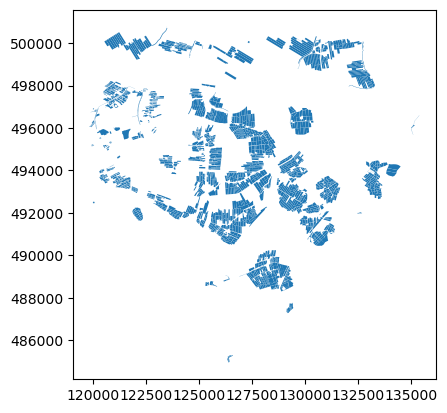

In [18]:
# get the unique indexes, and use the iloc indexer to select
# Since a polygon can fall into multiple buffers creating duplicated field indexes in the results
idx = fields_wells_buffer.index.unique()
fields_in_buffer = fields.iloc[idx]

fields_in_buffer.plot()

## Modify the geometry of a GeoDataFrame

<Axes: >

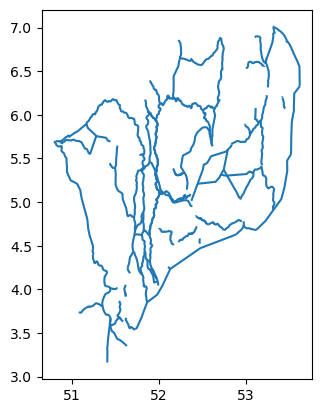

In [26]:
# load and visualize the Dutch waterway lines file status_vaarweg.zip
waterways_nl = gpd.read_file('data/status_vaarweg.zip')
waterways_nl.plot()

In [27]:
# Take a look on what makes up the geometry column of waterways_nl
waterways_nl['geometry']

0     LINESTRING (52.41810 4.84060, 52.42070 4.84090...
1     LINESTRING (52.11910 4.67450, 52.11930 4.67340...
2     LINESTRING (52.10090 4.25730, 52.10390 4.25530...
3     LINESTRING (53.47250 6.84550, 53.47740 6.83840...
4     LINESTRING (52.32270 5.14300, 52.32100 5.14640...
                            ...                        
86    LINESTRING (51.49270 5.39100, 51.48050 5.39160...
87    LINESTRING (52.15900 5.38510, 52.16010 5.38340...
88    LINESTRING (51.97340 4.12420, 51.97110 4.12220...
89    LINESTRING (52.11910 4.67450, 52.11850 4.67430...
90    LINESTRING (51.88940 4.61900, 51.89040 4.61350...
Name: geometry, Length: 91, dtype: geometry

In [28]:
# Open the third row 
print(waterways_nl['geometry'][2])
print(type(waterways_nl['geometry'][2]))

LINESTRING (52.100900002 4.25730000099998, 52.1039 4.25529999999998, 52.111299999 4.24929999900002, 52.1274 4.23449999799999)
<class 'shapely.geometry.linestring.LineString'>


In [29]:
#use shapely to flip the geometry
import shapely

# Define a function flipping the x and y coordinate values
def flip(geometry):
    return shapely.ops.transform(lambda x, y: (y, x), geometry)
# shapely transform function docs https://shapely.readthedocs.io/en/stable/manual.html#shapely.ops.transform
# more on lambda https://realpython.com/python-lambda/

# Apply this function to all coordinates and lines
geom_corrected = waterways_nl['geometry'].apply(flip)

<Axes: >

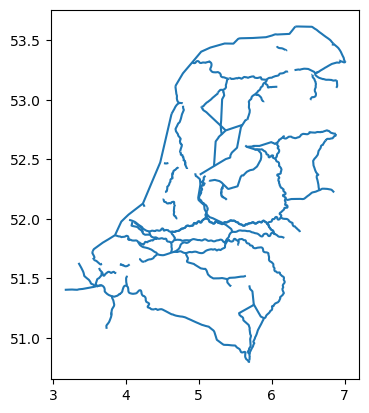

In [30]:
# Update geometry
waterways_nl['geometry'] = geom_corrected

# Visualization
waterways_nl.plot()

In [ ]:
# Export updated geometry
waterways_nl.to_file('waterways_nl_corrected.shp')